In [1]:
import numpy as np

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

C:\Users\giusa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\giusa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
lotr_scripts = pd.read_csv("lotr_scripts.csv")
lotr_scripts

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King
...,...,...,...,...
2385,2385,PIPPIN,Merry!,The Return of the King
2386,2386,ARAGORN,Merry!,The Return of the King
2387,2387,MERRY,He's always followed me everywhere I went sinc...,The Return of the King
2388,2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,The Return of the King


In [4]:
lotr_scripts["row_id"] = lotr_scripts.index + 1

In [5]:
print(lotr_scripts.head(10))

   Unnamed: 0     char                                             dialog  \
0           0   DEAGOL  Oh Smeagol Ive got one! , Ive got a fish Smeag...   
1           1  SMEAGOL     Pull it in! Go on, go on, go on, pull it in!     
2           2   DEAGOL                                           Arrghh!    
3           3  SMEAGOL                                          Deagol!     
4           4  SMEAGOL                                          Deagol!     
5           5  SMEAGOL                                          Deagol!     
6           6  SMEAGOL                     Give us that! Deagol my love     
7           7   DEAGOL                                             Why?     
8           8  SMEAGOL      Because' , it's my birthday and I wants it.     
9           9  SMEAGOL                                     My precious.     

                     movie  row_id  
0  The Return of the King        1  
1  The Return of the King        2  
2  The Return of the King        3  
3  T

In [6]:

#create a new data frame with "id" and "comment" fields
lotr_scripts_subset = lotr_scripts[['row_id', 'dialog']].copy()
#data clean-up
#remove all non-aphabet characters
lotr_scripts_subset['dialog'] = lotr_scripts_subset['dialog'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
lotr_scripts_subset['dialog'] = lotr_scripts_subset['dialog'].str.casefold()
print (lotr_scripts_subset.head(10))

   row_id                                             dialog
0       1  oh smeagol ive got one    ive got a fish smeag...
1       2     pull it in  go on  go on  go on  pull it in   
2       3                                           arrghh  
3       4                                          deagol   
4       5                                          deagol   
5       6                                          deagol   
6       7                     give us that  deagol my love  
7       8                                             why   
8       9      because    it s my birthday and i wants it   
9      10                                     my precious   


C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\3898861415.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  lotr_scripts_subset['dialog'] = lotr_scripts_subset['dialog'].str.replace("[^a-zA-Z#]", " ")


In [7]:
# set up empty dataframe for staging output
df_lotr_scripts=pd.DataFrame()
df_lotr_scripts['row_id']=['99999999999']
df_lotr_scripts['sentiment_type']='NA999NA'
df_lotr_scripts['sentiment_score']=0

In [8]:
df_lotr_scripts

,row_id,sentiment_type,sentiment_score
0,99999999999,NA999NA,0


In [10]:
print('Processing sentiment analysis...')

sid = SIA()

t_df = df_lotr_scripts

for index, row in lotr_scripts_subset.iterrows():
    scores = sid.polarity_scores(str(row[1]))
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df_lotr_scripts['row_id']=row[0]
        df_lotr_scripts['sentiment_type']=key
        df_lotr_scripts['sentiment_score']=value
        t_df=t_df.append(df_lotr_scripts)
        
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
#only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

print(t_df_cleaned.head(10))

Processing sentiment analysis...


C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\10

   row_id sentiment_type  sentiment_score
0       1       compound           0.0000
0       2       compound           0.0000
0       3       compound           0.0000
0       4       compound           0.0000
0       5       compound           0.0000
0       6       compound           0.0000
0       7       compound           0.6369
0       8       compound           0.0000
0       9       compound           0.0000
0      10       compound           0.5719


C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)
C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\1019833427.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df_lotr_scripts)


In [11]:
#merge dataframes
df_output = pd.merge(lotr_scripts, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))


   Unnamed: 0     char                                             dialog  \
0           0   DEAGOL  Oh Smeagol Ive got one! , Ive got a fish Smeag...   
1           1  SMEAGOL     Pull it in! Go on, go on, go on, pull it in!     
2           2   DEAGOL                                           Arrghh!    
3           3  SMEAGOL                                          Deagol!     
4           4  SMEAGOL                                          Deagol!     
5           5  SMEAGOL                                          Deagol!     
6           6  SMEAGOL                     Give us that! Deagol my love     
7           7   DEAGOL                                             Why?     
8           8  SMEAGOL      Because' , it's my birthday and I wants it.     
9           9  SMEAGOL                                     My precious.     

                     movie  row_id sentiment_type  sentiment_score  
0  The Return of the King        1       compound           0.0000  
1  The Return 

In [42]:
lotr_sentiment = pd.DataFrame(df_output)
lotr_sentiment


,Unnamed: 0,char,dialog,movie,row_id,sentiment_type,sentiment_score
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King,1,compound,0.0000
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King,2,compound,0.0000
2,2,DEAGOL,Arrghh!,The Return of the King,3,compound,0.0000
3,3,SMEAGOL,Deagol!,The Return of the King,4,compound,0.0000
4,4,SMEAGOL,Deagol!,The Return of the King,5,compound,0.0000
...,...,...,...,...,...,...,...
2385,2385,PIPPIN,Merry!,The Return of the King,2386,compound,0.5423
2386,2386,ARAGORN,Merry!,The Return of the King,2387,compound,0.5423
2387,2387,MERRY,He's always followed me everywhere I went sinc...,The Return of the King,2388,compound,-0.0387
2388,2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,The Return of the King,2389,compound,0.4576


In [43]:
lotr_sentiment.sort_values(by='sentiment_score', ascending=False)

,Unnamed: 0,char,dialog,movie,row_id,sentiment_type,sentiment_score
261,261,MERRY,My lady. You are fair and brave and have much ...,The Return of the King,262,compound,0.9800
2021,2021,BILBO,"Frodo, someone at the door. ,In fact, it ...",The Fellowship of the Ring,2022,compound,0.9672
415,415,GOLLUM,Sneaking? Sneaking? Fat Hobbit is always so ...,The Return of the King,416,compound,0.9593
1970,1970,GANDALF,It was more than mere chance thatbrought Merry...,The Two Towers,1971,compound,0.9356
2174,2174,BILBO,"Alas, elevnty-one years is far too short a tim...",The Fellowship of the Ring,2175,compound,0.9246
...,...,...,...,...,...,...,...
128,128,WITCH KING,You fool! No man can kill me. Die now!,The Return of the King,129,compound,-0.9287
986,986,FARAMIR,"The enemy? ,His sense of duty was no lessthan ...",The Two Towers,987,compound,-0.9468
496,496,GOLLUM,"Master betrayed us. Wicked. Tricksy. False. ,W...",The Two Towers,497,compound,-0.9626
342,342,EOMER,You know as little of war as that Hobbit. Wh...,The Return of the King,343,compound,-0.9663


In [44]:
lotr_sentiment_scores = lotr_sentiment.groupby('char').agg({'sentiment_score': 'mean'})
lotr_sentiment_scores 

,sentiment_score
char,
ARAGORN,-0.003606
ARMY,-0.599400
ARWEN,0.024218
BARLIMAN,0.353050
BILBO,0.243606
...,...
VOICE,0.000000
WHITE WIZARD,0.000000
WILDMAN,-0.543267


In [15]:
lotr_sentiment_scores.sort_values(by='sentiment_score', ascending=False).head(10)

,sentiment_score
char,
LADY,0.659700
GALADRIEL VOICEOVER,0.556300
HOBBIT,0.427167
MERRY and PIPPIN,0.417933
EOTHAIN,0.401900
FRODO VOICE OVER,0.389250
GANDALF,0.381800
ARWEN VOICEOVER,0.361200
BARLIMAN,0.353050


In [16]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('\(GOLLUM', 'GOLLUM').replace('GAN DALF', 'GANDALF').replace('FRODO VOICE', 'FRODO')

C:\Users\giusa\AppData\Local\Temp\ipykernel_17872\187760524.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('\(GOLLUM', 'GOLLUM').replace('GAN DALF', 'GANDALF').replace('FRODO VOICE', 'FRODO')


In [17]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('BILBO VOICE OVER', 'BILBO')

In [18]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('\xa0GANDALF', 'GANDALF')

In [19]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GALADRIEL VOICE OVER', 'GALADRIEL')

In [20]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GANDALF VOICEOVER', 'GANDALF')

In [21]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('SARUMAN VOICE OVER ', 'SARUMAN')

In [22]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GATEKEEPR', 'GATEKEEPER')

In [23]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('FRODO VOICE OVER', 'FRODO').replace('SARUMAN VOICEOVER', 'SARUMAN')

In [24]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GALADRIEL VOICEOVER', 'GALADRIEL').replace('SAM ', 'SAM')

In [25]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('SARUMAN VOICE OVER', 'SARUMAN').replace('MAN', 'MEN')

In [26]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('SAURON VOICE', 'SAURON').replace('GANDALF VOICE OVER', 'GANDALF')

In [27]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('SOLDIER 1', 'SOLDIERS').replace('SOLDIER 2', 'SOLDIERS')

In [28]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('SAM VOICEOVER', 'SAM').replace('BILBO VOICEOVER', 'BILBO')

In [29]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('ELROND VOICEOVER', 'ELROND').replace('ARWEN VOICEOVER', 'ARWEN')

In [30]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GALADRIEL VOICE-OVER', 'GALADRIEL').replace('FRODO ', 'FRODO')

In [31]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('GALADRIL', 'GALADRIEL')

In [32]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('MERRY AND PIPPIN', 'MERRY')

In [33]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('EOWYN/MERRY', 'EOWYN')

In [34]:
lotr_sentiment['char'] = lotr_sentiment['char'].str.replace('ARAGORN ', 'ARAGORN').replace('ARGORN', 'ARAGORN')

In [40]:
lotr_sentiment['char'] =lotr_sentiment['char'].str.replace('URUK HAI', 'URUK-HAI')

In [41]:
lotr_sentiment

,Unnamed: 0,char,dialog,movie,row_id,sentiment_type,sentiment_score
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King,1,compound,0.0000
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King,2,compound,0.0000
2,2,DEAGOL,Arrghh!,The Return of the King,3,compound,0.0000
3,3,SMEAGOL,Deagol!,The Return of the King,4,compound,0.0000
4,4,SMEAGOL,Deagol!,The Return of the King,5,compound,0.0000
...,...,...,...,...,...,...,...
2385,2385,PIPPIN,Merry!,The Return of the King,2386,compound,0.5423
2386,2386,ARAGORN,Merry!,The Return of the King,2387,compound,0.5423
2387,2387,MERRY,He's always followed me everywhere I went sinc...,The Return of the King,2388,compound,-0.0387
2388,2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,The Return of the King,2389,compound,0.4576


In [45]:
lotr_sentiment_scores = lotr_sentiment_scores.reset_index()
lotr_sentiment_scores

,char,sentiment_score
0,ARAGORN,-0.003606
1,ARMY,-0.599400
2,ARWEN,0.024218
3,BARLIMAN,0.353050
4,BILBO,0.243606
...,...,...
83,VOICE,0.000000
84,WHITE WIZARD,0.000000
85,WILDMAN,-0.543267
86,WITCH KING,-0.052650


In [46]:
#lotr_sentiment_scores.drop(lotr_sentiment_scores.index[3])

In [47]:
#lotr_sentiment_scores.drop(1)

In [54]:
lotr_sentiment_scores['char'].unique()

array(['ARAGORN', 'ARMY', 'ARWEN', 'BARLIMAN', 'BILBO', 'BOROMIR',
       'BOSON', 'CAPTAIN', 'CHILDREN HOBBITS', 'CROWD', 'DAMROD',
       'DEAGOL', 'DENETHOR', 'ELROND', 'EOMER', 'EOTHAIN', 'EOWYN',
       'EYE OF SAURON', 'FARAMIR', 'FARMER MAGGOT', 'FIGWIT', 'FREDA',
       'FRODO', 'GAFFER', 'GALADRIEL', 'GAMLING', 'GANDALF', 'GATEKEEPER',
       'GENERAL', 'GENERAL SHOUT', 'GIMLI', 'GOLLUM', 'GORBAG', 'GOTHMOG',
       'GRIMA', 'GRIMBOLD', 'GRISHNAK', 'GRISHNAKH', 'HALDIR', 'HAMA',
       'HOBBIT', 'IROLAS', 'KING OF THE DEAD', 'LADY', 'LEGOLAS',
       'MADRIL', 'MEN', 'MERCENARY', 'MERRY', 'MORWEN', 'MOUTH OF SAURON',
       'MRS BRACEGIRDLE', 'NOAKES', 'OLD MAN', 'ORCS', 'PEOPLE', 'PIPPIN',
       'PROUDFOOT HOBBIT', 'RING', 'ROHAN HORSEMAN', 'ROHAN STABLEMAN',
       'ROHIRRIM', 'ROSIE', 'SAM', 'SANDYMAN', 'SARUMAN', 'SAURON',
       'SHAGRAT', 'SHARKU', 'SMEAGOL', 'SNAGA', 'SOLDIERS',
       'SOLDIERS IN MINAS TIRITH', 'SOLDIERS ON GATE', 'STRIDER',
       'THEODEN', 'TREEBE

In [49]:
lotr_sentiment_scores['char'] =lotr_sentiment_scores['char'].str.replace('BOROMIR ', 'BOROMIR').replace('MERRY and PIPPIN', 'MERRY')

In [51]:
lotr_sentiment_scores['char'] =lotr_sentiment_scores['char'].str.replace('ORC', 'ORCS').replace('SOLDIER', 'SOLDIERS')

In [53]:
lotr_sentiment_scores['char'] =lotr_sentiment_scores['char'].str.replace('ORCSS', 'ORCS')

In [56]:
lotr_sentiment_scores.drop([20, 71, 1, 85, 63, 33, 54, 55, 7], inplace=True)

In [58]:
lotr_sentiment_scores.drop([37,42, 43, 35, 34, 67, 64], inplace=True)

In [60]:
lotr_sentiment_scores.drop([15, 28, 46, 13, 51], inplace=True)

In [62]:
lotr_sentiment_scores.drop([39, 62, 86], inplace=True)

In [65]:
lotr_sent_neg = lotr_sentiment_scores.sort_values(by='sentiment_score', ascending=True).head(10)

In [66]:
lotr_sent_neg

,char,sentiment_score
6,BOROMIR,-0.526700
82,URUK-HAI,-0.198550
14,ELROND,-0.138090
69,SAURON,-0.079533
68,SARUMAN,-0.060334
25,GALADRIEL,-0.053658
45,LEGOLAS,-0.048100
81,UGLUK,-0.041444
79,THEODEN,-0.038025
66,SAM,-0.036678


In [80]:
lotr_sent_pos = lotr_sentiment_scores.sort_values(by='sentiment_score', ascending=False).head(10)

In [81]:
lotr_sent_pos

,char,sentiment_score
50,MERRY,0.417933
4,BILBO,0.243606
65,ROSIE,0.220200
59,PIPPIN,0.108675
56,ORCS,0.060823
22,FREDA,0.034233
26,GAMLING,0.032487
23,FRODO,0.029983
52,MOUTH OF SAURON,0.028820
2,ARWEN,0.024218


In [68]:
lotr_sentiment_scores.drop([44, 41, 16, 3, 38, 53, 73, 58], inplace=True)

In [70]:
lotr_sentiment_scores.drop([21, 87, 24, 70], inplace=True)

In [83]:
#lotr_sentiment_scores.drop([49], inplace=True)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

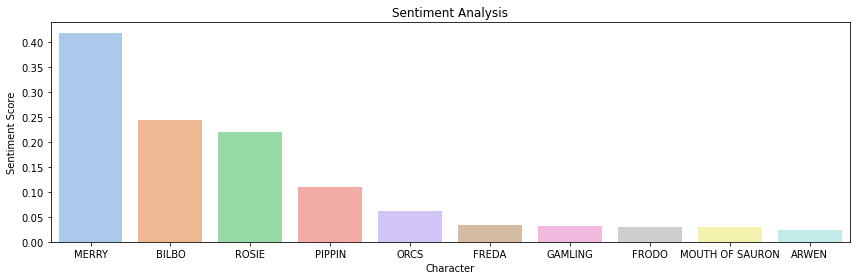

In [82]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(12,4), tight_layout=True)
ax = sns.barplot(x=lotr_sent_pos['char'], y=lotr_sent_pos['sentiment_score'], palette='pastel', ci=None)
ax.set(title='Sentiment Analysis', xlabel='Character', ylabel='Sentiment Score')
plt.show()

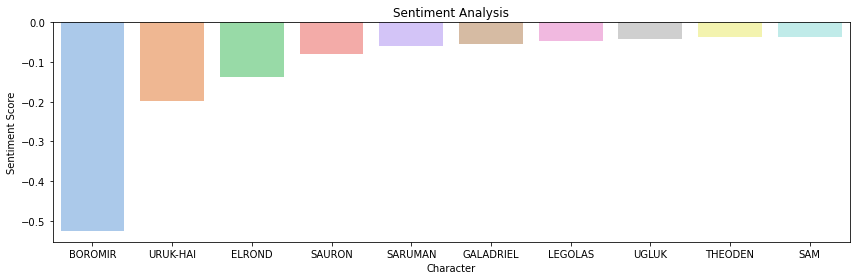

In [76]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(12,4), tight_layout=True)
ax = sns.barplot(x=lotr_sent_neg['char'], y=lotr_sent_neg['sentiment_score'], palette='pastel', ci=None)
ax.set(title='Sentiment Analysis', xlabel='Character', ylabel='Sentiment Score')
plt.show()

In [183]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\giusa\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.2.2          |   py39hb82d6ee_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py39hb82d6ee_0

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.14.0



==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [213]:
text = " ".join(review for review in lotr_sentiment.dialog)

In [211]:
lotr_sentiment['dialog'] = lotr_sentiment['dialog'].astype(str)

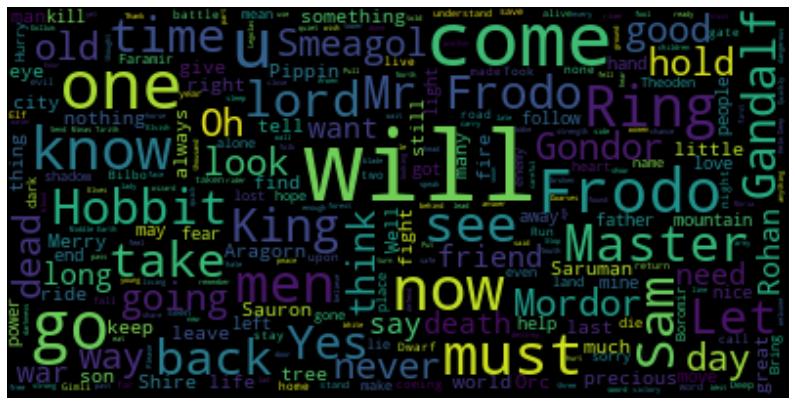

In [215]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='black', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [221]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq [:n]

common_words = get_top_n_words(lotr_sentiment['dialog'], 500)

df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1

,Review,count
0,the,1165
1,you,739
2,of,582
3,to,570
4,it,508
...,...,...
495,listen,7
496,passed,7
497,mustn,7
498,steward,7


In [226]:
df1.drop([9,27, 23,31,43, 48, 36, 39, ], inplace=True)

In [268]:
df1.head(50)

,Review,count
0,the,1165
1,you,739
2,of,582
3,to,570
4,it,508
5,and,435
6,is,358
7,we,324
8,he,258
10,not,238


In [240]:
df1.drop([9,27, 23,31,43, 48, 36, 39, ], inplace=True)

In [247]:
df1.drop([69 ], inplace=True)

In [263]:
df1.drop([73 ], inplace=True)

In [264]:
text_df = " ".join(review for review in df1.Review)

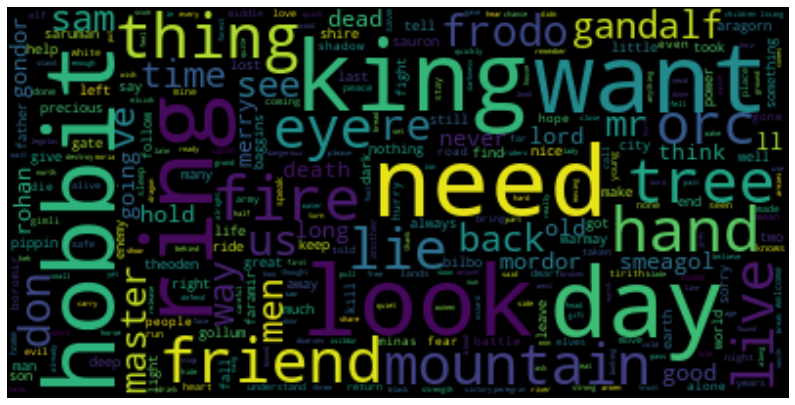

In [265]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='black', max_font_size = 50, max_words = 5000).generate(text_df)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()